
# 0. Veri Setinin Hazırlanması 

**Veri Seti ve Adresi:**



Online Sales Dataset: https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset> 

In [1]:
#Kullanacağımız kütüphaneleri yükleyelim.
import numpy as np 
import pandas as pd 
import os
#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#Veri setini notebook içine dahil edelim.

df_=pd.read_csv("/kaggle/input/online-sales-dataset/online_sales_dataset.csv")
df=df_.copy()


In [4]:
#Veri setinde rastgele eksik veriler oluşturalım.
import random
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                             seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

# 1. Veri Setine İlk Bakış

In [5]:
#Veri setinin ilk 5 gözlemini görelim.
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [6]:
#Veri setinin son 10 gözlemini görelim.
df.tail(10)

#Son 5 gözlemi görmek istersek df.tail() kullanılır.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49772,224131,SKU_1095,USB Cable,27,2025-09-04 20:00,30.87,63980.0,Italy,0.38,Credit Card,14.48,Apparel,In-store,Not Returned,UPS,Amsterdam,High
49773,370260,SKU_1570,Blue Pen,12,2025-09-04 21:00,51.83,85250.0,Italy,0.32,Credit Card,22.44,Accessories,In-store,Not Returned,Royal Mail,Rome,Medium
49774,274759,SKU_1899,USB Cable,43,2025-09-04 22:00,12.63,14206.0,Sweden,0.11,paypall,27.75,Electronics,Online,Not Returned,DHL,Amsterdam,High
49775,405597,SKU_1140,Backpack,37,2025-09-04 23:00,66.64,12024.0,Italy,0.35,paypall,19.93,Apparel,Online,Returned,UPS,Rome,Low
49776,524453,SKU_1316,Office Chair,43,2025-09-05 00:00,84.19,84399.0,United Kingdom,0.25,Credit Card,21.38,Electronics,Online,Not Returned,DHL,Amsterdam,Low
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [7]:
#Veri setinin satır ve sütun sayılarını görmek için .shape kullanılır.
df.shape

(49782, 17)

In [8]:
#Veri setinin kolon isimlerine erişmek için .columns kullanılır.
print(df.columns)

#len() fonksiyonu ile toplam kolon sayısını yazdırıyoruz.
print(f"Veri setinde toplam {len(df.columns)} kolon vardır. ")

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')
Veri setinde toplam 17 kolon vardır. 


In [9]:
#Veri setine ait yapısal bilgileri verir.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [10]:
#Veri setinin istatistiksel olarak bakmak için describe() kullanılır.
#df.describe()
#.T ile elde ettiğimiz veriyi transpoze ederek daha kolay okumamıza yardımcı olur.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,49782.0,550681.239946,260703.009944,100005.00,324543.0000,552244.00,776364.00,999997.000000
Quantity,49782.0,22.372343,17.917774,-50.00,11.0000,23.00,37.00,49.000000
UnitPrice,49782.0,47.537862,33.479510,-99.98,23.5925,48.92,74.61,100.000000
CustomerID,44804.0,55032.871775,25913.660157,10001.00,32750.7500,55165.00,77306.25,99998.000000
Discount,49782.0,0.275748,0.230077,0.00,0.1300,0.26,0.38,1.999764
ShippingCost,47293.0,17.494529,7.220557,5.00,11.2200,17.50,23.72,30.000000


# 2. Eksik Verilerin Analizi


Veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi amaçlıyoruz.

**Eksik Verilerin Gözlenmesi**


In [11]:
#Her bir kategoride kaçar tane null değer olduğunu verir.
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [12]:
#Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.
df.isnull().sum().sum()


10952

In [13]:
# Veri setindeki eksik olmayan değerlerin sayısı
df.notnull().sum()

InvoiceNo            49782
StockCode            49782
Description          49782
Quantity             49782
InvoiceDate          49782
UnitPrice            49782
CustomerID           44804
Country              49782
Discount             49782
PaymentMethod        49782
ShippingCost         47293
Category             49782
SalesChannel         49782
ReturnStatus         49782
ShipmentProvider     49782
WarehouseLocation    46297
OrderPriority        49782
dtype: int64

In [14]:
print(f"Veri setinde {df.notnull().sum().sum()} tane eksik olmayan değer vardır, Veri setinde {df.isnull().sum().sum()} tane eksik değer vardır.")

Veri setinde 835342 tane eksik olmayan değer vardır, Veri setinde 10952 tane eksik değer vardır.



****Discount:İndirimSHipping Cost:Nakliye MaliyetiUnitPrice:Birim Fiyatı****



In [15]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:10]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00,85.74,46567.0,Belgium,0.15,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00,95.65,75098.0,Norway,0.04,Bank Transfer,6.48,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00,98.19,87950.0,Belgium,0.05,paypall,12.56,Apparel,Online,Not Returned,UPS,Berlin,High
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00,98.17,39718.0,Italy,0.16,Bank Transfer,7.71,Apparel,Online,Not Returned,Royal Mail,London,Low
10,621430,SKU_1144,Notebook,49,2020-01-01 10:00,87.56,13030.0,United Kingdom,0.19,paypall,9.83,Stationery,In-store,Returned,UPS,Paris,Medium


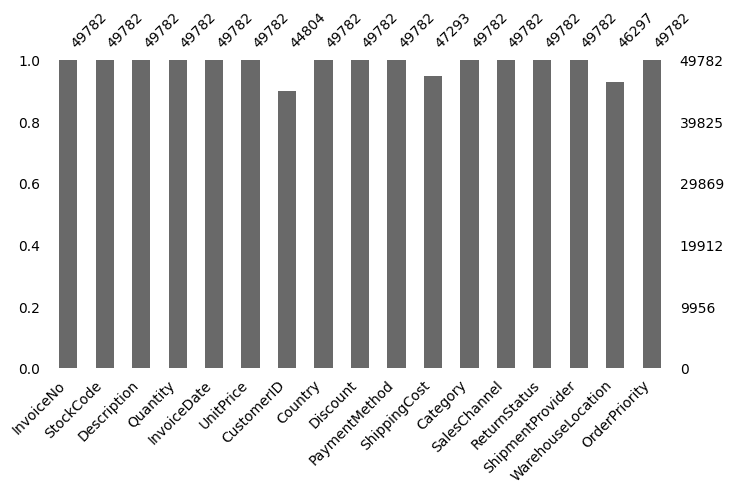

In [16]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);



Örneğin InvoiceNo için 49782 adet eksik olmayan gözlem sayısıdır.

In [17]:
#Veri setinde hangi ulkelerin yer aldığını gorelim.
df.Country.unique()  

array(['Australia', 'Spain', 'Germany', 'Netherlands', 'United Kingdom',
       'Sweden', 'Belgium', 'Norway', 'Italy', 'Portugal', 'France',
       'United States'], dtype=object)

In [18]:
#Toplam kaç tane Country sütununda benzersiz değer olduğunu verir.
df.Country.unique().size


12

In [19]:
#Hnagi ödeme türünden kaçar tane gerçekleştiridiğini buluyoruz.

df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64

In [20]:
#Satılan ürüne göre birim fiyatın toplam ne kadar olduğunu buluyoruz.
df.groupby("Description").agg({"UnitPrice":"sum"})
#En çok White Mug ürününden satılmıştır.

,UnitPrice
Description,
Backpack,218657.88
Blue Pen,213825.87
Desk Lamp,217030.62
Headphones,215603.89
Notebook,211464.47
Office Chair,212763.33
T-shirt,212974.23
USB Cable,215050.15
Wall Clock,215009.72


In [21]:
#Ülke kırılımında ödeme şekillerinin birim fiyatının toplamı verilmiştir.
df.groupby(by=["Country","PaymentMethod"]).agg({"UnitPrice":"sum"})

UnitPrice
Country        PaymentMethod           
Australia      Bank Transfer   64677.11
               Credit Card     64823.56
               paypall         64576.78
Belgium        Bank Transfer   65663.82
               Credit Card     70561.95
               paypall         66356.96
France         Bank Transfer   66295.18
               Credit Card     64297.51
               paypall         68224.57
Germany        Bank Transfer   71076.34
               Credit Card     61784.56
               paypall         64337.81
Italy          Bank Transfer   66147.85
               Credit Card     62499.07
               paypall         63472.39
Netherlands    Bank Transfer   64505.34
               Credit Card     64984.43
               paypall         62752.58
Norway         Bank Transfer   68175.71
               Credit Card     66372.70
               paypall         63080.32
Portugal       Bank Transfer   66819.41
               Credit Card     67735.21
               paypall         64667.88
Spain          Bank Transfer   66230.12
               Credit Card     61985.73
               paypall         65742.91
Sweden         Bank Transfer   67592.63
               Credit Card     65821.34
               paypall         67636.93
United Kingdom Bank Transfer   68505.79
               Credit Card     64666.47
               paypall         65443.87
United States  Bank Transfer   65126.57
               Credit Card     66324.59
               paypall         67563.84

In [22]:
#Veri setinde kaçar tane olduğunu kategorilere ayırıp hesapladık.
df["Category"].value_counts()


Category
Furniture      10084
Accessories     9975
Electronics     9931
Stationery      9928
Apparel         9864
Name: count, dtype: int64

# 3. Verilerin Görselleştirilmesi

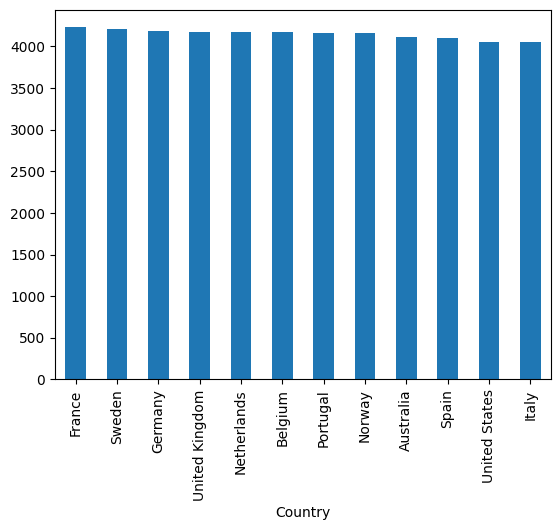

In [23]:
df['Country'].value_counts().plot(kind='bar')
plt.show()


Ülke bilgilerinin dağılım bilgilerdir.

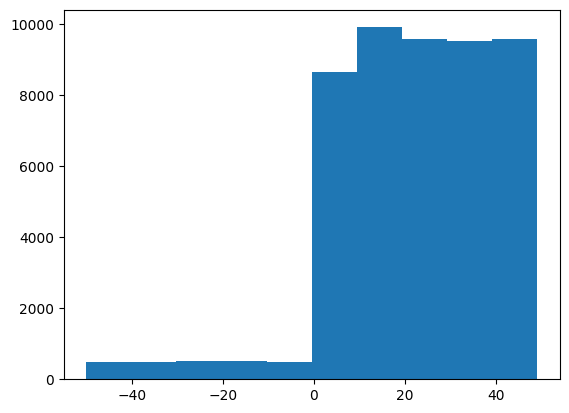

In [24]:
plt.hist(df['Quantity'])
plt.show()

Quantity değişkenine göre sayısal grafiktir.